In [1]:
install.packages("readxl")


also installing the dependency 'cpp11'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Package which is only available in source form, and may need
  compilation of C/C++/Fortran: 'readxl'


  These will not be installed


installing the source package 'cpp11'



In [2]:
library(readxl)

In [3]:
# paths to the weekly and monthly filtered folders
weekly_folder <- "C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final/PSA_FOR_weekly_filtered"
monthly_folder <- "C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final/PSA_FOR_monthly_filtered"

In [4]:
# Function to load all Excel files from a folder
load_excel_files <- function(folder_path) {
  # Get all Excel file paths in the folder
  file_paths <- list.files(path = folder_path, pattern = "*.xlsx", full.names = TRUE)
  
  # Read all Excel files into a list of data frames
  data_list <- lapply(file_paths, read_excel)
  
  # Optionally, assign names to the list elements based on file names
  names(data_list) <- basename(file_paths)
  
  return(data_list)
}

# Load data from both weekly and monthly final folders
weekly_data <- load_excel_files(weekly_folder)
monthly_data <- load_excel_files(monthly_folder)


In [5]:

# Load data from both weekly and monthly final folders
weekly_data <- load_excel_files(weekly_folder)
monthly_data <- load_excel_files(monthly_folder)


In [6]:
names(weekly_data)

[1] "Full_ArtCharizard_GX_#SV49_grade_10.xlsx"                         
[2] "Full_ArtCharizard_Vmax_#020_grade_10.xlsx"                        
[3] "Full_ArtCharizard_Vmax_#SV107_grade_10.xlsx"                      
[4] "Full_ArtM_Charizard_EX_#101_grade_10.xlsx"                        
[5] "Full_ArtMoltres_&_Zapdos_&_Articuno_GX_#69_(SECRET)_grade_10.xlsx"
[6] "Charizard-Holo_#11_grade_9.xlsx"                                  
[7] "Charizard-Holo_#4_grade_8_FINAL.xlsx"                             
[8] "Charizard-Holo_#4_grade_9_FINAL.xlsx"                             
[9] "Charizard_GX_#9_grade_10.xlsx"

In [7]:
names(monthly_data)

[1] "Full_ArtJessie_&_James_#68_grade_10.xlsx"                                   
[2] "Full_ArtM_Charizard_EX_#101_grade_10.xlsx"                                  
[3] "Charizard-Holo_#11_grade_9.xlsx"                                            
[4] "Charizard-Holo_#4_grade_8_FINAL.xlsx"                                       
[5] "Charizard-Holo_#4_grade_9_FINAL.xlsx"                                       
[6] "Charizard-Reverse_Foil_#11_grade_9.xlsx"                                    
[7] "Red's_Pikachu_#270_(POKEMON_CENTER_20TH_ANNIVERSARY_CAMPAIGN)_grade_10.xlsx"
[8] "Reshiram_&_Charizard_GX_#20_grade_10.xlsx"                                  
[9] "Venusaur-Holo_#15_grade_9_FINAL.xlsx"

In [8]:
install.packages("dplyr")


also installing the dependencies 'cli', 'glue', 'lifecycle', 'pillar', 'rlang', 'tibble', 'tidyselect', 'vctrs'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'cli' 'glue' 'rlang' 'tibble'
  'tidyselect' 'vctrs' 'dplyr'


  These will not be installed


installing the source packages 'lifecycle', 'pillar'

Warning message in install.packages("dplyr"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'pillar' had non-zero exit status"

In [9]:
install.packages("lubridate")


also installing the dependency 'timechange'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'timechange' 'lubridate'


  These will not be installed


In [10]:
library(dplyr)
library(lubridate)
library(tidyr)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [11]:
library(dplyr)
library(lubridate)

# Aggregating data by week and ensuring missing weeks are kept
aggregate_weekly_data_with_correct_weeks <- function(data) {
  data$date <- as.Date(data$date)  # Ensure the date is in Date format
  
  # Define the start of the week (we can use Monday as the start of the week)
  data <- data %>%
    mutate(week_start = as.Date(cut(date, breaks = "week", start.on.monday = TRUE)))  # Grouping by week
  
  # Create a full sequence of weeks from min to max date
  full_weeks <- data.frame(week_start = seq.Date(from = min(data$week_start), 
                                                 to = max(data$week_start), 
                                                 by = "week"))
  
  # Aggregate data by week
  aggregated_data <- data %>%
    group_by(week_start) %>%  # Group by the new 'week_start' column
    summarise(
      avg_price = mean(as.numeric(gsub("[$,]", "", price)), na.rm = FALSE),  # Calculate average price
      total_auctions = n()  # Count the number of auctions per week
    )
  
  # Merge the aggregated data with the full sequence of weeks
  complete_weekly_data <- full_weeks %>%
    left_join(aggregated_data, by = "week_start")  # Keep all weeks, even if they have no data
  
  return(complete_weekly_data)
}

# Apply this function to the weekly data
weekly_data_aggregated <- lapply(weekly_data, aggregate_weekly_data_with_correct_weeks)

# Check one dataset's result
head(weekly_data_aggregated[[1]])



week_start,avg_price,total_auctions
2019-09-16,1340.0000,1
2019-09-23,1027.5000,2
2019-09-30,785.6875,8
2019-10-07,712.5000,2
2019-10-14,656.3333,3
2019-10-21,610.0525,4


In [12]:
print(weekly_data_aggregated)


$`Full_ArtCharizard_GX_#SV49_grade_10.xlsx`
    week_start avg_price total_auctions
1   2019-09-16 1340.0000              1
2   2019-09-23 1027.5000              2
3   2019-09-30  785.6875              8
4   2019-10-07  712.5000              2
5   2019-10-14  656.3333              3
6   2019-10-21  610.0525              4
7   2019-10-28  540.0000              4
8   2019-11-04  595.0000              1
9   2019-11-11  589.5000              1
10  2019-11-18  460.0000              1
11  2019-11-25  511.0000              1
12  2019-12-02  499.9950              2
13  2019-12-09  524.9950              2
14  2019-12-16  485.2600              3
15  2019-12-23  470.3980              5
16  2019-12-30  455.0000              2
17  2020-01-06  521.1100              1
18  2020-01-13  440.5000              2
19  2020-01-20  463.9967              3
20  2020-01-27  604.9950              2
21  2020-02-03  557.0000              5
22  2020-02-10  450.0000              1
23  2020-02-17  462.4440            

In [13]:
# Aggregating data by month and ensuring missing months are kept
aggregate_monthly_data_with_correct_months <- function(data) {
  data$date <- as.Date(data$date)  # Ensure the date is in Date format
  
  # Group by the first day of each month
  data <- data %>%
    mutate(month_start = as.Date(cut(date, breaks = "month")))  # Grouping by month
  
  # Create a full sequence of months
  full_months <- data.frame(month_start = seq.Date(from = min(data$month_start), 
                                                   to = max(data$month_start), 
                                                   by = "month"))
  
  # Aggregate data by month
  aggregated_data <- data %>%
    group_by(month_start) %>%  # Group by the new 'month_start' column
    summarise(
      avg_price = mean(as.numeric(gsub("[$,]", "", price)), na.rm = FALSE),  # Calculate average price
      total_auctions = n()  # Count the number of auctions per month
    )
  
  # Merge the aggregated data with the full sequence of months
  complete_monthly_data <- full_months %>%
    left_join(aggregated_data, by = "month_start")  # Keep all months, even if they have no data
  
  return(complete_monthly_data)
}

# Apply this function to the monthly data
monthly_data_aggregated <- lapply(monthly_data, aggregate_monthly_data_with_correct_months)

# Check one dataset's result
head(monthly_data_aggregated[[1]])



month_start,avg_price,total_auctions
2019-10-01,36.00000,1
2019-11-01,34.38375,8
2019-12-01,31.66857,7
2020-01-01,31.51143,7
2020-02-01,30.49875,8
2020-03-01,24.76286,7


In [14]:
print(monthly_data_aggregated)

$`Full_ArtJessie_&_James_#68_grade_10.xlsx`
   month_start avg_price total_auctions
1   2019-10-01  36.00000              1
2   2019-11-01  34.38375              8
3   2019-12-01  31.66857              7
4   2020-01-01  31.51143              7
5   2020-02-01  30.49875              8
6   2020-03-01  24.76286              7
7   2020-04-01  30.84091             11
8   2020-05-01  32.76000             16
9   2020-06-01  39.95250             12
10  2020-07-01  44.76385             13
11  2020-08-01  37.77182             11
12  2020-09-01  43.56063             16
13  2020-10-01  59.81462             13
14  2020-11-01  68.75750             20
15  2020-12-01  80.86267             15
16  2021-01-01 144.28571              7
17  2021-02-01 142.68615             13
18  2021-03-01 133.69750             12
19  2021-04-01 120.12818             11
20  2021-05-01  92.04333              3
21  2021-06-01  70.66667              3
22  2021-07-01  89.41769             13
23  2021-08-01  83.39043            

In [15]:
# Identify missing values in the aggregated weekly data
check_missing_weekly <- function(data) {
  # Filter the rows where 'price' is NA
  missing_weeks <- data %>%
    filter(is.na(avg_price))  # Assuming 'avg_price' is the aggregated price column
  
  return(missing_weeks)
}

# Apply the function to all aggregated weekly datasets
weekly_missing_data <- lapply(weekly_data_aggregated, check_missing_weekly)

# View the weeks with missing values
print(weekly_missing_data)


$`Full_ArtCharizard_GX_#SV49_grade_10.xlsx`
   week_start avg_price total_auctions
1  2021-06-21        NA             NA
2  2021-11-29        NA             NA
3  2022-02-07        NA             NA
4  2022-02-21        NA             NA
5  2022-02-28        NA             NA
6  2022-03-07        NA             NA
7  2022-03-14        NA             NA
8  2022-03-21        NA             NA
9  2022-03-28        NA             NA
10 2022-04-04        NA             NA
11 2022-04-11        NA             NA
12 2022-04-18        NA             NA
13 2022-04-25        NA             NA
14 2022-05-09        NA             NA
15 2022-05-16        NA             NA
16 2022-05-23        NA             NA
17 2022-06-13        NA             NA
18 2022-06-20        NA             NA
19 2022-06-27        NA             NA
20 2022-07-04        NA             NA
21 2022-07-11        NA             NA
22 2022-07-18        NA             NA
23 2022-07-25        NA             NA
24 2022-08-01       

In [16]:
# Function to calculate the proportion of missing weeks
calculate_missing_proportion <- function(data) {
  total_weeks <- nrow(data)  # Total number of weeks
  missing_weeks <- sum(is.na(data$avg_price))  # Number of weeks with missing price
  missing_proportion <- missing_weeks / total_weeks  # Proportion of missing weeks
  return(missing_proportion)
}

# Apply this function to each dataset in the aggregated weekly data
weekly_missing_proportions <- sapply(weekly_data_aggregated, calculate_missing_proportion)

# Display the missing proportions for each dataset
weekly_missing_proportions


Full_ArtCharizard_GX_#SV49_grade_10.xlsx 
                                                        0.1969112 
                        Full_ArtCharizard_Vmax_#020_grade_10.xlsx 
                                                        0.1857143 
                      Full_ArtCharizard_Vmax_#SV107_grade_10.xlsx 
                                                        0.1729730 
                        Full_ArtM_Charizard_EX_#101_grade_10.xlsx 
                                                        0.1658416 
Full_ArtMoltres_&_Zapdos_&_Articuno_GX_#69_(SECRET)_grade_10.xlsx 
                                                        0.1811024 
                                  Charizard-Holo_#11_grade_9.xlsx 
                                                        0.1547912 
                             Charizard-Holo_#4_grade_8_FINAL.xlsx 
                                                        0.1770335 
                             Charizard-Holo_#4_grade_9_FINAL.xlsx 
                                                        0.2014388 
                                    Charizard_GX_#9_grade_10.xlsx 
                                                        0.1771654

In [17]:
# Identify missing values in the aggregated monthly data
check_missing_monthly <- function(data) {
  # Filter the rows where 'price' is NA
  missing_months <- data %>%
    filter(is.na(avg_price))  # Assuming 'avg_price' is the aggregated price column
  
  return(missing_months)
}

# Apply the function to all aggregated monthly datasets
monthly_missing_data <- lapply(monthly_data_aggregated, check_missing_monthly)

# View the months with missing values
monthly_missing_data


month_start,avg_price,total_auctions
2022-07-01,NA,NA
2022-08-01,NA,NA
2024-02-01,NA,NA
month_start,avg_price,total_auctions
2022-07-01,NA,NA
2022-08-01,NA,NA
month_start,avg_price,total_auctions
2022-07-01,NA,NA
2022-08-01,NA,NA
month_start,avg_price,total_auctions


In [18]:
# Function to calculate the proportion of missing months
calculate_missing_proportion_monthly <- function(data) {
  total_months <- nrow(data)  # Total number of months
  missing_months <- sum(is.na(data$avg_price))  # Number of months with missing price
  missing_proportion <- missing_months / total_months  # Proportion of missing months
  return(missing_proportion)
}

# Apply this function to each dataset in the aggregated monthly data
monthly_missing_proportions <- sapply(monthly_data_aggregated, calculate_missing_proportion_monthly)

# Display the missing proportions for each dataset
monthly_missing_proportions


Full_ArtJessie_&_James_#68_grade_10.xlsx 
                                                                 0.05000000 
                                  Full_ArtM_Charizard_EX_#101_grade_10.xlsx 
                                                                 0.02127660 
                                            Charizard-Holo_#11_grade_9.xlsx 
                                                                 0.02127660 
                                       Charizard-Holo_#4_grade_8_FINAL.xlsx 
                                                                 0.04123711 
                                       Charizard-Holo_#4_grade_9_FINAL.xlsx 
                                                                 0.04123711 
                                    Charizard-Reverse_Foil_#11_grade_9.xlsx 
                                                                 0.03191489 
Red's_Pikachu_#270_(POKEMON_CENTER_20TH_ANNIVERSARY_CAMPAIGN)_grade_10.xlsx 
                                                                 0.04166667 
                                  Reshiram_&_Charizard_GX_#20_grade_10.xlsx 
                                                                 0.04761905 
                                       Venusaur-Holo_#15_grade_9_FINAL.xlsx 
                                                                 0.03092784

In [19]:
# Linear interpolation for missing values
weekly_data_interpolated <- lapply(weekly_data_aggregated, function(df) {
  df$avg_price <- zoo::na.approx(df$avg_price, na.rm = FALSE)  # Linear interpolation
  return(df)
})


In [20]:
print(weekly_data_interpolated)

$`Full_ArtCharizard_GX_#SV49_grade_10.xlsx`
    week_start avg_price total_auctions
1   2019-09-16 1340.0000              1
2   2019-09-23 1027.5000              2
3   2019-09-30  785.6875              8
4   2019-10-07  712.5000              2
5   2019-10-14  656.3333              3
6   2019-10-21  610.0525              4
7   2019-10-28  540.0000              4
8   2019-11-04  595.0000              1
9   2019-11-11  589.5000              1
10  2019-11-18  460.0000              1
11  2019-11-25  511.0000              1
12  2019-12-02  499.9950              2
13  2019-12-09  524.9950              2
14  2019-12-16  485.2600              3
15  2019-12-23  470.3980              5
16  2019-12-30  455.0000              2
17  2020-01-06  521.1100              1
18  2020-01-13  440.5000              2
19  2020-01-20  463.9967              3
20  2020-01-27  604.9950              2
21  2020-02-03  557.0000              5
22  2020-02-10  450.0000              1
23  2020-02-17  462.4440            

In [21]:
# Linear interpolation for missing values - MONTHLY DATA
monthly_data_interpolated <- lapply(monthly_data_aggregated, function(df) {
  df$avg_price <- zoo::na.approx(df$avg_price, na.rm = FALSE)  # Linear interpolation
  return(df)
})

In [22]:
print(monthly_data_interpolated)

$`Full_ArtJessie_&_James_#68_grade_10.xlsx`
   month_start avg_price total_auctions
1   2019-10-01  36.00000              1
2   2019-11-01  34.38375              8
3   2019-12-01  31.66857              7
4   2020-01-01  31.51143              7
5   2020-02-01  30.49875              8
6   2020-03-01  24.76286              7
7   2020-04-01  30.84091             11
8   2020-05-01  32.76000             16
9   2020-06-01  39.95250             12
10  2020-07-01  44.76385             13
11  2020-08-01  37.77182             11
12  2020-09-01  43.56063             16
13  2020-10-01  59.81462             13
14  2020-11-01  68.75750             20
15  2020-12-01  80.86267             15
16  2021-01-01 144.28571              7
17  2021-02-01 142.68615             13
18  2021-03-01 133.69750             12
19  2021-04-01 120.12818             11
20  2021-05-01  92.04333              3
21  2021-06-01  70.66667              3
22  2021-07-01  89.41769             13
23  2021-08-01  83.39043            

In [23]:
install.packages('ggplot2')

also installing the dependencies 'cli', 'farver', 'isoband', 'lifecycle', 'rlang', 'scales', 'vctrs', 'withr'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'cli' 'farver' 'isoband' 'rlang'
  'scales' 'vctrs'


  These will not be installed


installing the source packages 'lifecycle', 'withr', 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"

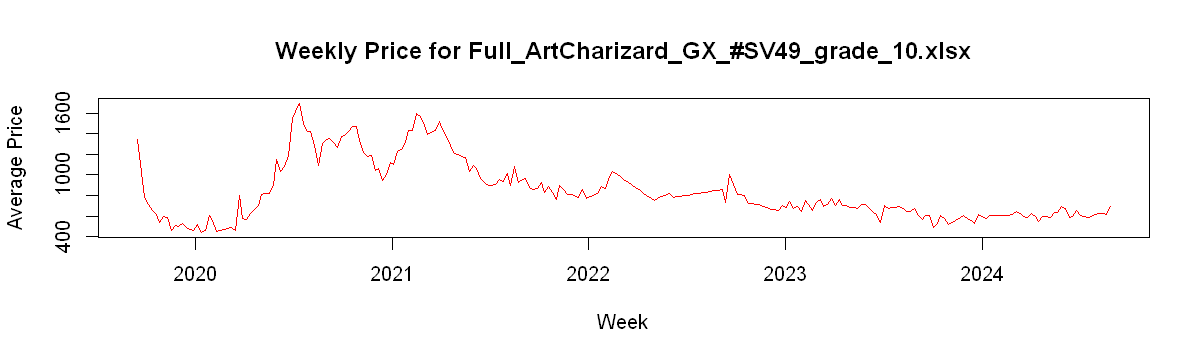

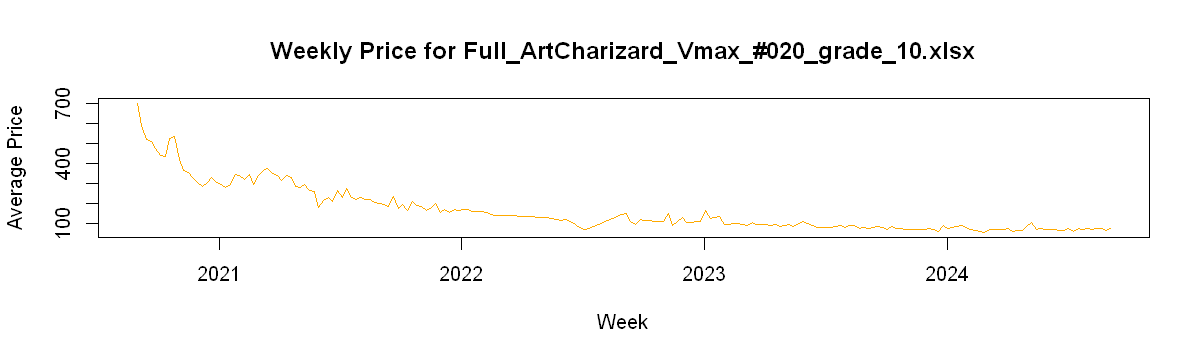

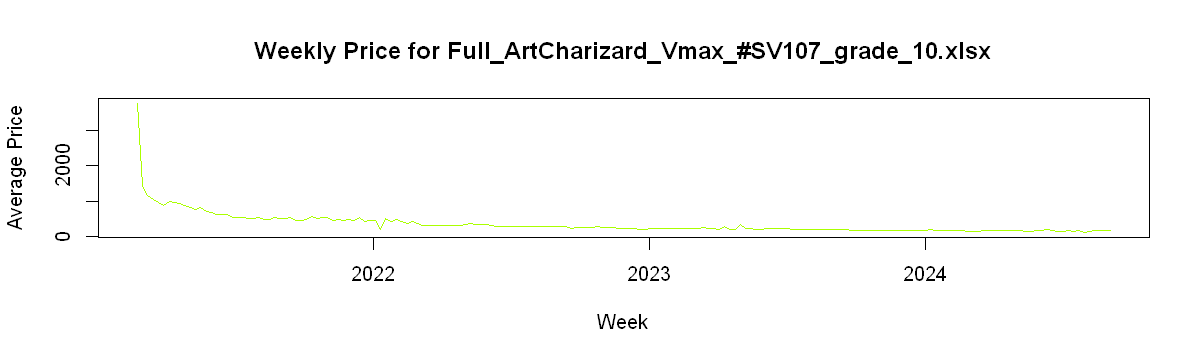

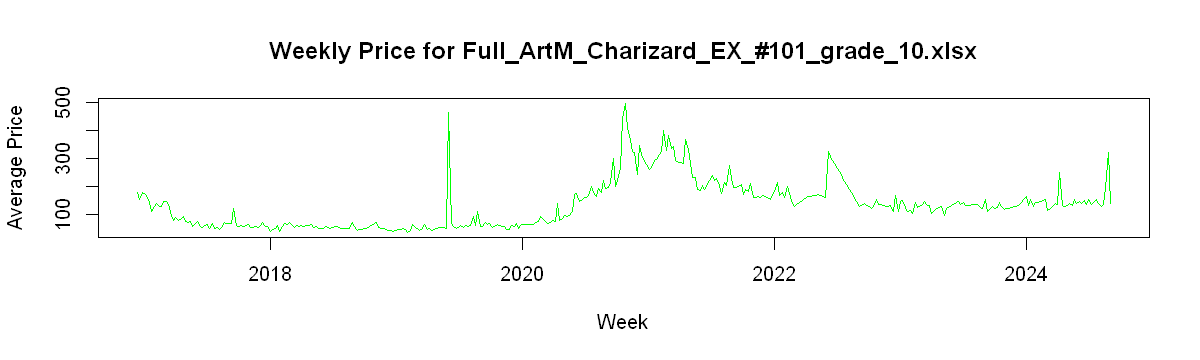

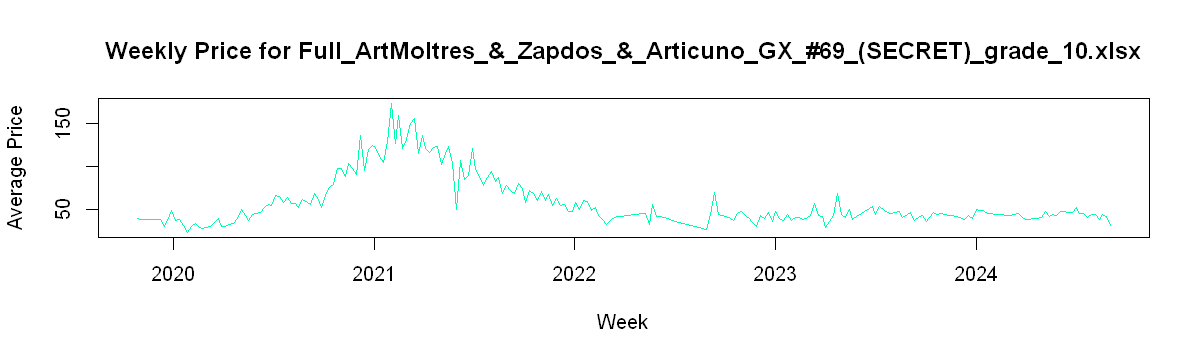

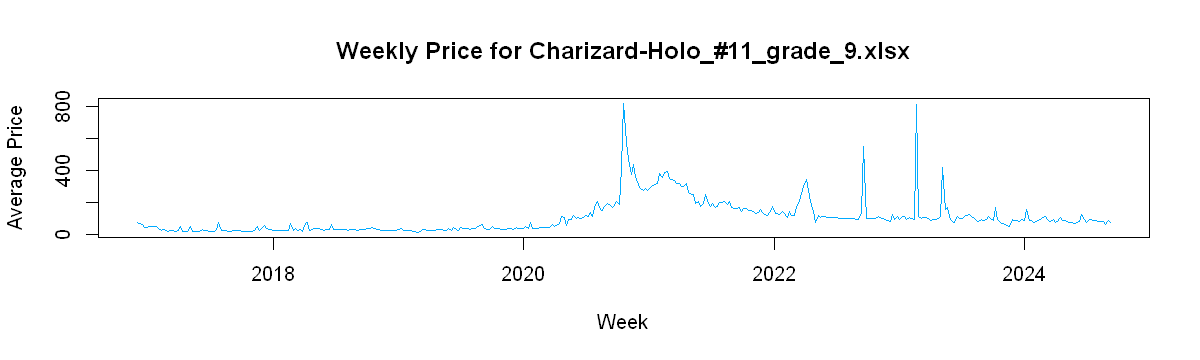

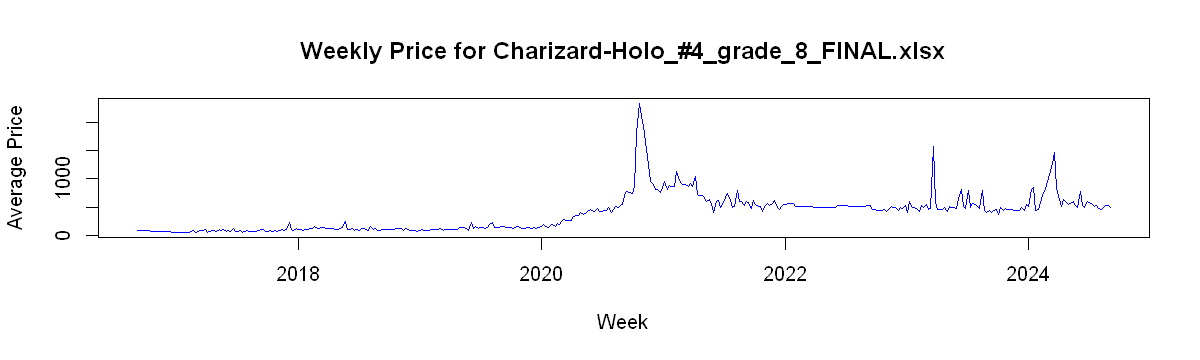

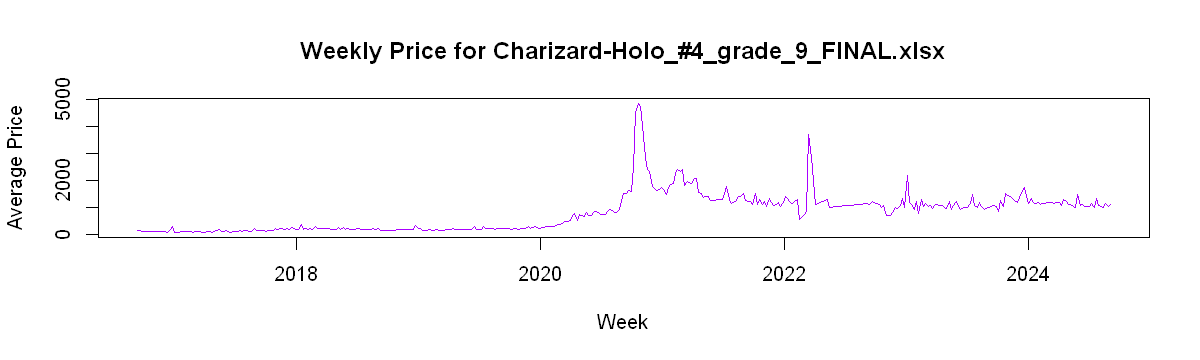

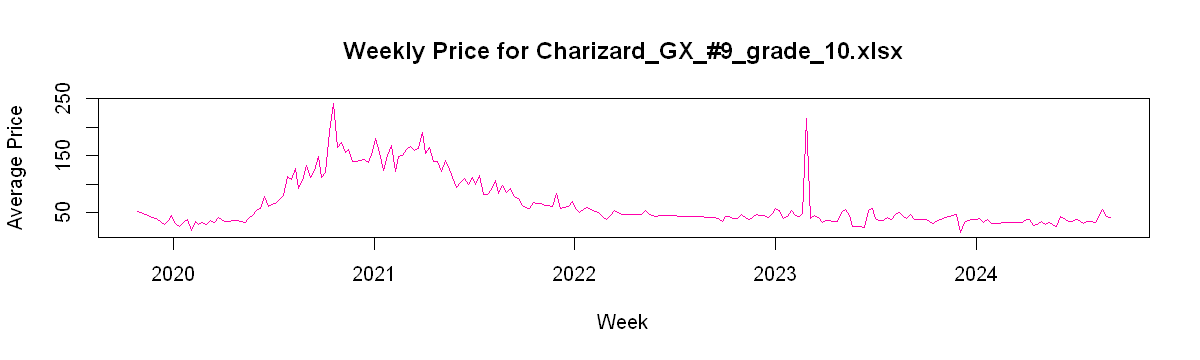

In [43]:
# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 3)

# Define colors
colors <- rainbow(length(weekly_data_interpolated))

# Loop through each card's weekly data
for (i in seq_along(weekly_data_interpolated)) {
  df <- weekly_data_interpolated[[i]]
  card_name <- names(weekly_data_interpolated)[i]
  
  # Create the plot without ylim
  plot(df$week_start, df$avg_price, type = 'l', col = colors[i], 
       ylab = 'Average Price', xlab = 'Week', 
       main = paste('Weekly Price for', card_name))
}



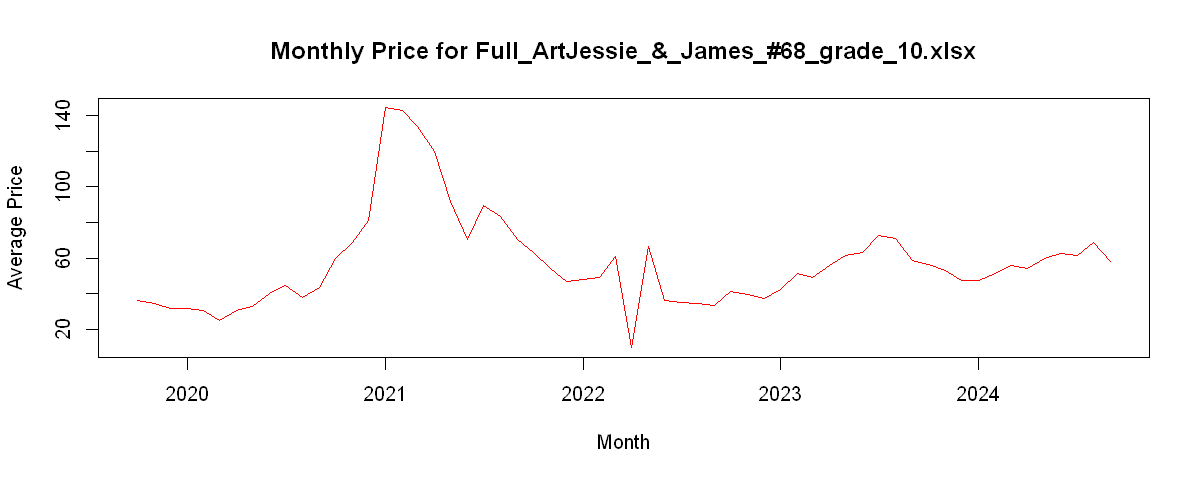

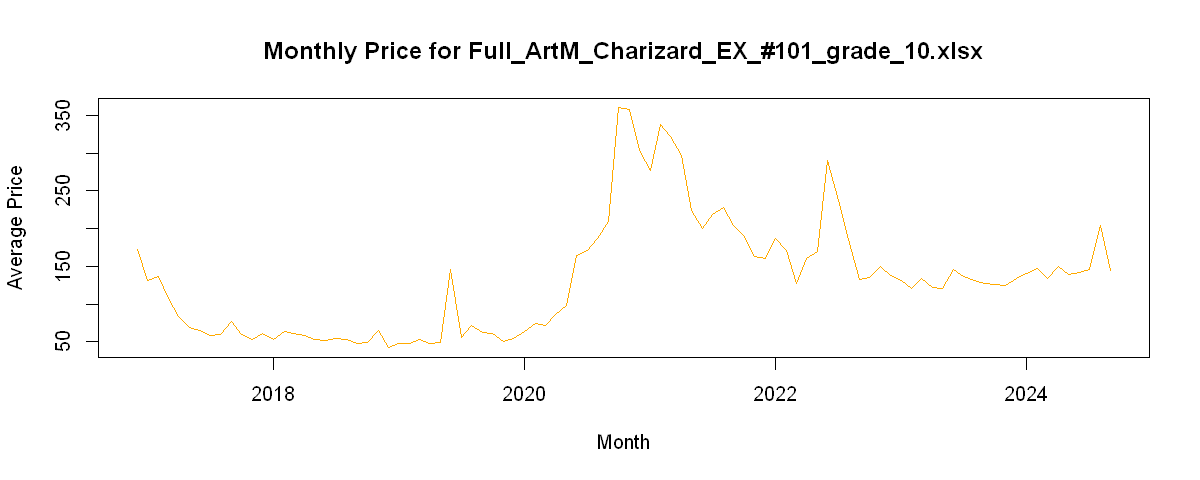

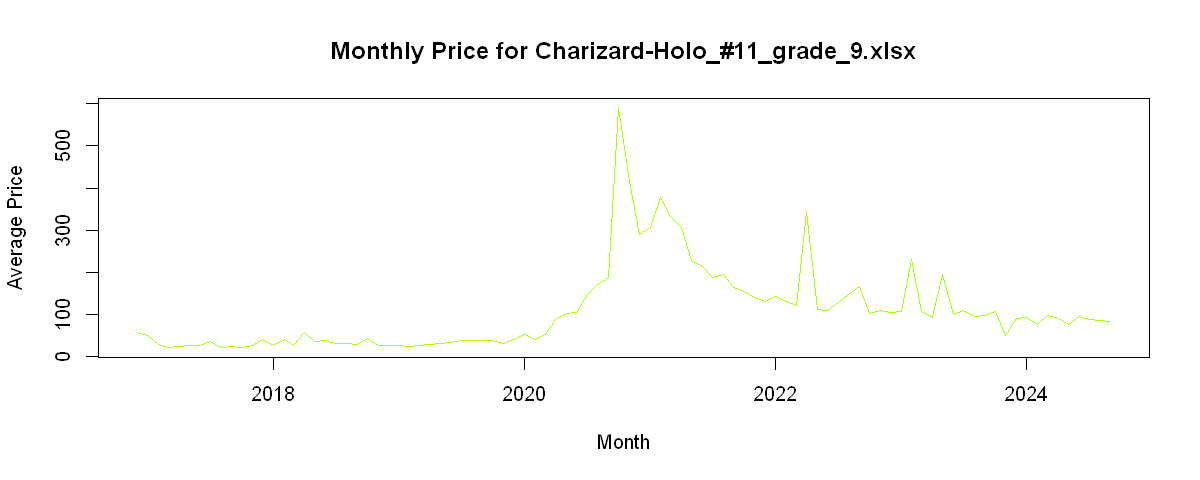

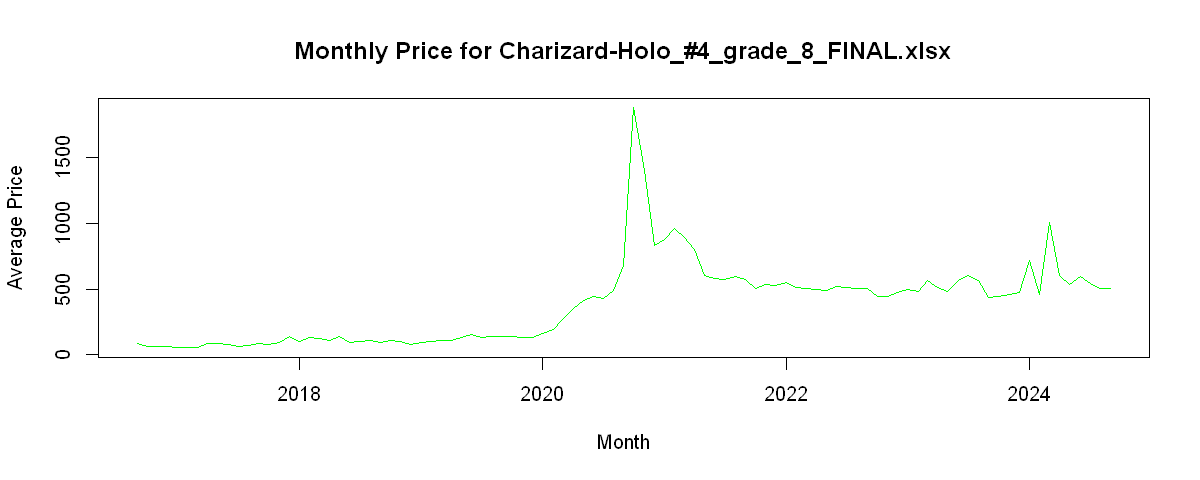

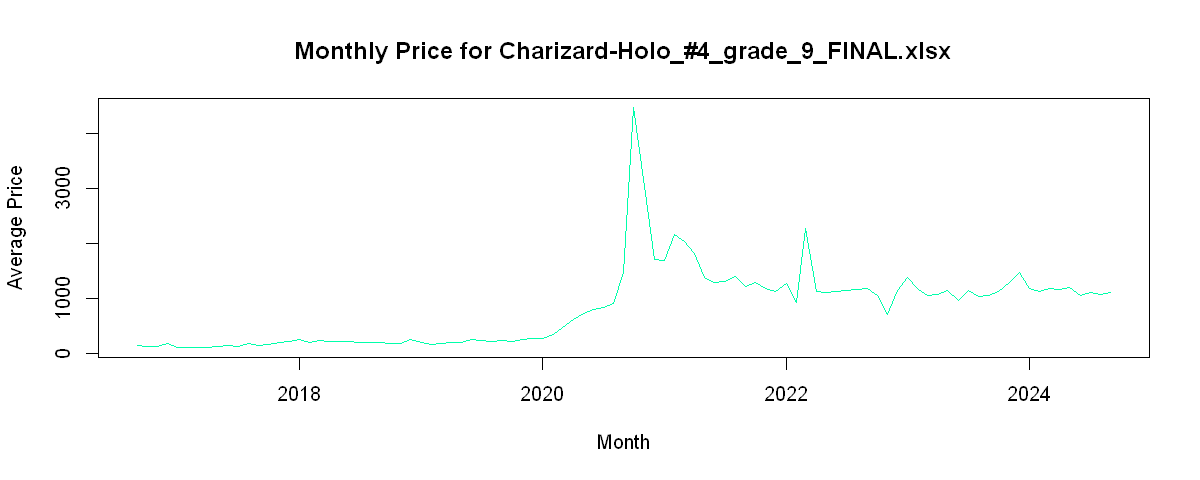

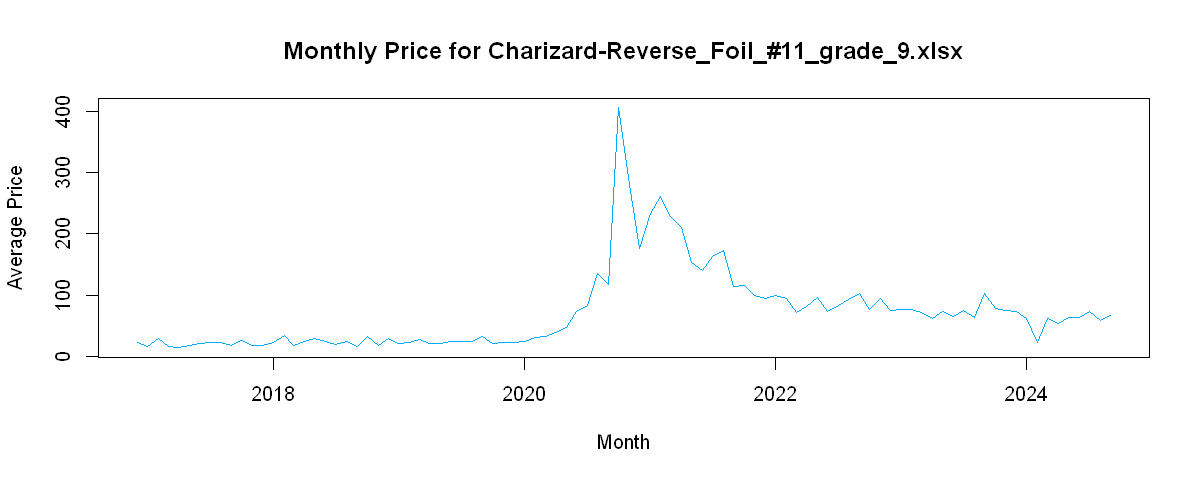

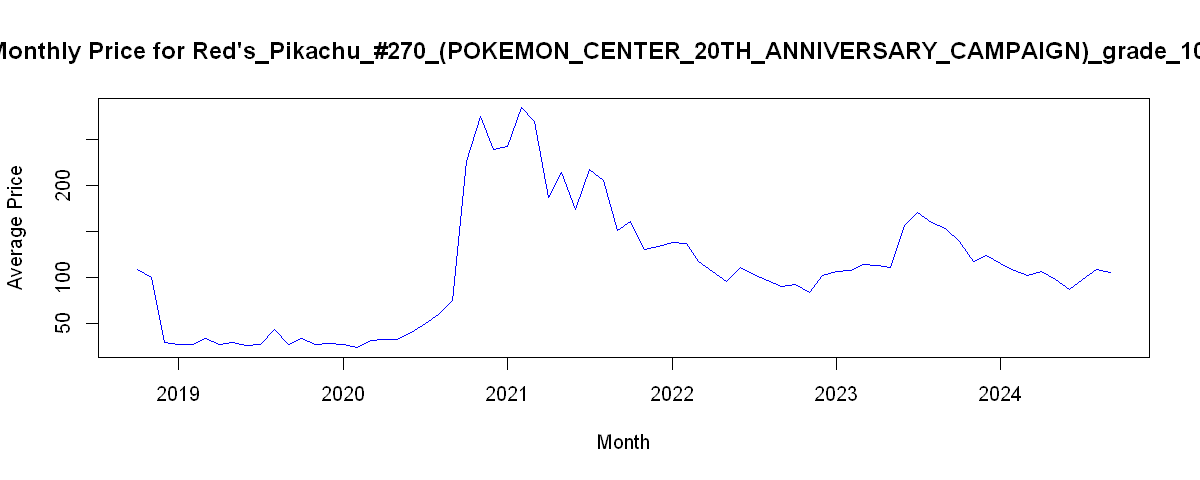

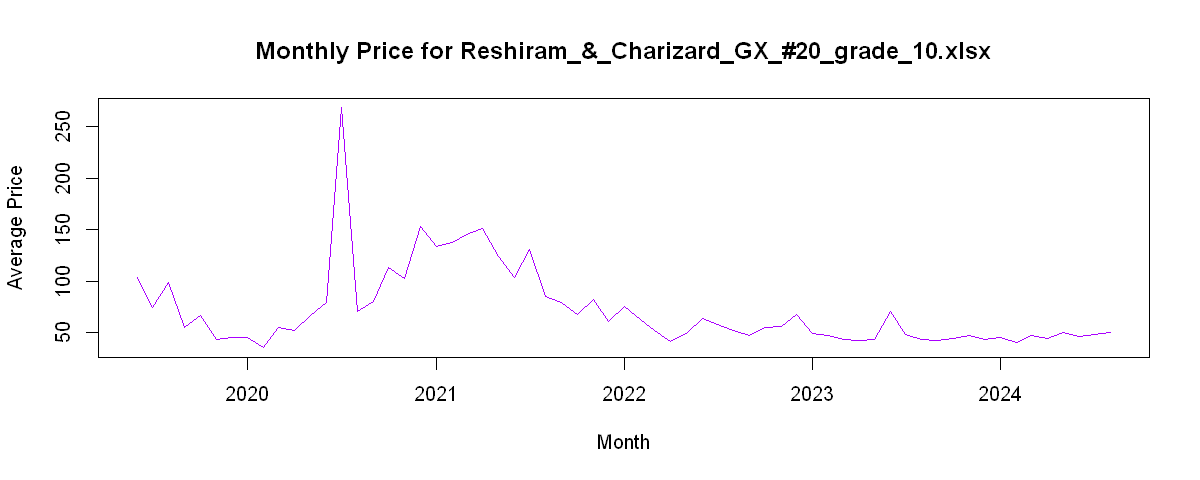

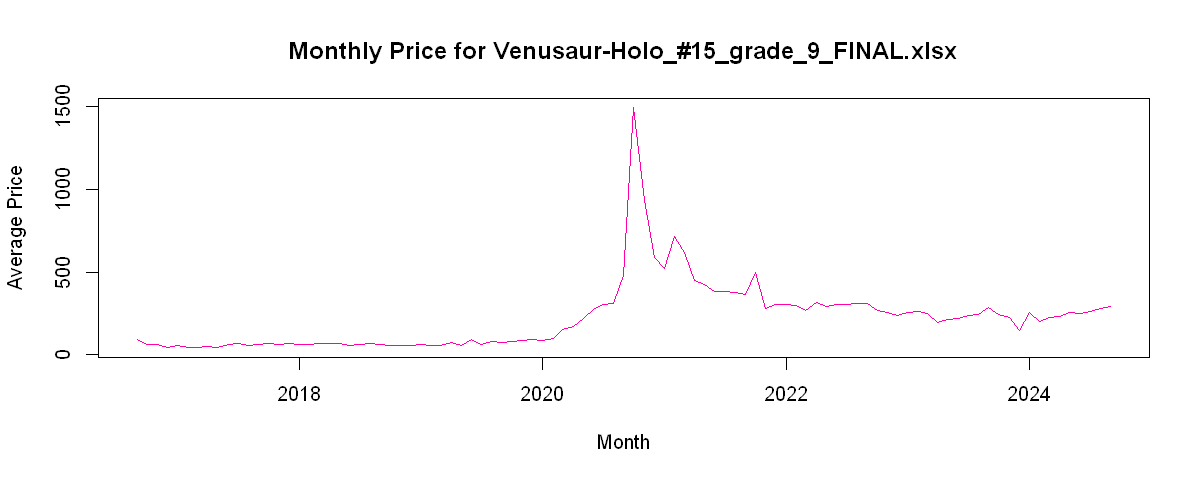

In [44]:
# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 4)

# Define colors
colors <- rainbow(length(monthly_data_interpolated))

# Loop through each card's monthly data
for (i in seq_along(monthly_data_interpolated)) {
  df <- monthly_data_interpolated[[i]]
  card_name <- names(monthly_data_interpolated)[i]
  
  # Create the plot without ylim
  plot(df$month_start, df$avg_price, type = 'l', col = colors[i], 
       ylab = 'Average Price', xlab = 'Month', 
       main = paste('Monthly Price for', card_name))
}


In [46]:
install.packages('tseries')

also installing the dependency 'quadprog'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'quadprog' 'tseries'


  These will not be installed


In [47]:
library(tseries)

# Loop through each card's weekly data
for (i in seq_along(weekly_data_interpolated)) {
  df <- weekly_data_interpolated[[i]]
  card_name <- names(weekly_data_interpolated)[i]
  
  # Perform tests on the log returns
  rets <- diff(log(df$avg_price))  # Calculate log returns, removing the first NA

  # Box.test
  box_test_result <- Box.test(rets, type = 'Ljung-Box')
  cat("Ljung-Box Test for", card_name, ":\n")
  print(box_test_result)
  
  # ADF test
  adf_test_result <- adf.test(rets, k = 1)
  cat("ADF Test for", card_name, ":\n")
  print(adf_test_result)
  
  # KPSS test for Level
  kpss_level_result <- kpss.test(rets, null = 'Level')
  cat("KPSS Test (Level) for", card_name, ":\n")
  print(kpss_level_result)
  
  # KPSS test for Trend
  kpss_trend_result <- kpss.test(rets, null = 'Trend')
  cat("KPSS Test (Trend) for", card_name, ":\n")
  print(kpss_trend_result)
  
  cat("\n")
}


ERROR: Error in library(tseries): there is no package called 'tseries'
